In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

'''
Part 8

Different analysis and plots based on data.xlsx
'''

df= pd.read_excel('C:/Users/janro/OneDrive - Universität Bayreuth/5u6Semester/Bachelorarbeit/data_re.xlsx', index_col=0)
df=df[['filingDate', 'reportDate', 'tone','abnormal_return', 'change', '% negative', '% positive', '% uncertainty', 'change_abs','number of words', 'ticker'] ]

In [3]:
#10-Ks in sample

print('Number of 10-Ks:', len(df))

#Total number of words

print('Total number of words:', df['number of words'].sum())

#Mean
print('\nMean:')
print('Tone Bannier:',round(df['tone'].mean(),4))
print('% negative:',round(df['% negative'].mean(),4))
print('% positive:',round(df['% positive'].mean(),4))
print('% uncertainty:',round(df['% uncertainty'].mean(),4))
print('number of words:',round(df['number of words'].mean(),4))

#Median
print('\nMedian:')
print('Tone Bannier:',round(df['tone'].median(),4))
print('% negative:',round(df['% negative'].median(),4))
print('% positive:',round(df['% positive'].median(),4))
print('% uncertainty:',round(df['% uncertainty'].median(),4))
print('number of words:',round(df['number of words'].median(),4))


Number of 10-Ks: 4085
Total number of words: 189156181

Mean:
Tone Bannier: -0.3869
% negative: 2.2013
% positive: 0.9529
% uncertainty: 1.8966
number of words: 46305.0627

Median:
Tone Bannier: -0.3908
% negative: 2.1523
% positive: 0.9436
% uncertainty: 1.8914
number of words: 42922.0


In [4]:
#Correaltions

#Best tone 
print('Correlation abnormal return and different tones:')
print('abnormal return - tone bannier',round(df['abnormal_return'].corr(df['tone']),4))
print('abnormal return - negative tone',round(df['abnormal_return'].corr(df['% negative']),4))
print('abnormal return - positive tone',round(df['abnormal_return'].corr(df['% positive']),4))

print('negative tone - tone bannier',round(df['% negative'].corr(df['tone']),4))

#Tone by year of filing
print('Tone by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
for year in range(2010,2022):
    df1 = df[df['filingDate'].dt.year == year]
    print(year, ': abnormal return - tone: ',round(df1['abnormal_return'].corr(df1['% negative']), 4), 'based on ', len(df1), 'filings')

#number of words - tone
print('\n\n')
print('Correlation number of words - tone:',round(df['number of words'].corr(df['% negative']),4))


Correlation abnormal return and different tones:
abnormal return - tone bannier -0.0142
abnormal return - negative tone 0.0205
abnormal return - positive tone -0.001
negative tone - tone bannier -0.6881
Tone by year of filing:
2010 : abnormal return - tone:  0.3118 based on  6 filings
2011 : abnormal return - tone:  -0.0426 based on  142 filings
2012 : abnormal return - tone:  0.0075 based on  206 filings
2013 : abnormal return - tone:  -0.069 based on  270 filings
2014 : abnormal return - tone:  0.0105 based on  328 filings
2015 : abnormal return - tone:  -0.0081 based on  385 filings
2016 : abnormal return - tone:  0.0806 based on  425 filings
2017 : abnormal return - tone:  0.0896 based on  452 filings
2018 : abnormal return - tone:  -0.0212 based on  467 filings
2019 : abnormal return - tone:  0.0873 based on  463 filings
2020 : abnormal return - tone:  -0.0136 based on  488 filings
2021 : abnormal return - tone:  0.0506 based on  453 filings



Correlation number of words - tone: 

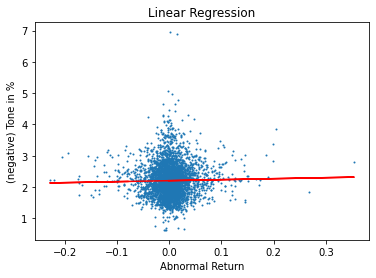

In [5]:
#Linear Regression abnormal return-tone
X = df.loc[:, 'abnormal_return'].values.reshape(-1, 1) 
Y = df.loc[:, '% negative'].values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('(negative) Tone in %')
plt.title('Linear Regression')
plt.show()

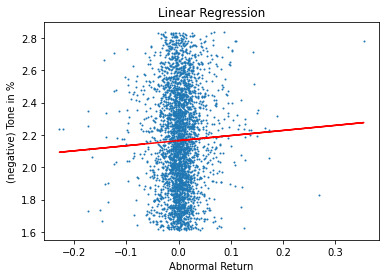

correlation without top and bottom 10 % quantile: 0.033778652451499615


In [6]:
df1=df[(df['% negative']>df['% negative'].quantile(0.1)) & (df['% negative']<df['% negative'].quantile(0.9))]

X = df1.loc[:, 'abnormal_return'].values.reshape(-1, 1)
Y = df1.loc[:, '% negative'].values.reshape(-1, 1)  
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)

plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('(negative) Tone in %')
plt.title('Linear Regression')
plt.show()

print('correlation without top and bottom 10 % quantile:', df1['abnormal_return'].corr(df1['% negative']))


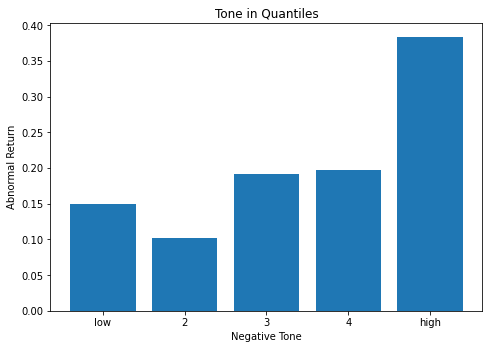

In [7]:
df01=df[df['% negative']<df['% negative'].quantile(0.2)]
df02=df[(df['% negative']>df['% negative'].quantile(0.2)) & (df['% negative']<df['% negative'].quantile(0.4))]
df03=df[(df['% negative']>df['% negative'].quantile(0.4)) & (df['% negative']<df['% negative'].quantile(0.6))]
df04=df[(df['% negative']>df['% negative'].quantile(0.6)) & (df['% negative']<df['% negative'].quantile(0.8))]
df05=df[(df['% negative']>df['% negative'].quantile(0.8))]
bars=np.array([df01['abnormal_return'].mean(),df02['abnormal_return'].mean(), df03['abnormal_return'].mean(), df04['abnormal_return'].mean(), df05['abnormal_return'].mean()])*100
label=['low', '2', '3', '4', 'high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
ax.set_xlabel('Negative Tone')
ax.set_ylabel('Abnormal Return')
ax.set_title('Tone in Quantiles')
plt.show()

mean: -0.3869
standard deviation: 0.1225


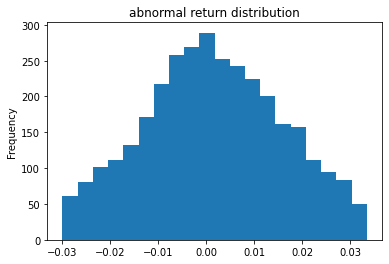

In [17]:
#Distributions
df_return=df[(df['abnormal_return']>df['abnormal_return'].quantile(0.1)) & (df['abnormal_return']<df['abnormal_return'].quantile(0.9))]
df_return['abnormal_return'].plot.hist(bins=20, title="abnormal return distribution", sharex= True)
print('mean:',round(df['tone'].mean(),4))
print('standard deviation:',round(df['tone'].std(),4))

#Distributions
#df['tone'].plot.hist(bins=20, title="Tone distribution", sharex= True)
#print('mean:',round(df['tone'].mean(),4))
#print('standard deviation:',round(df['tone'].std(),4))

<AxesSubplot:title={'center':'Distribution of negative words'}, xlabel='Top 100 words', ylabel='frequency'>

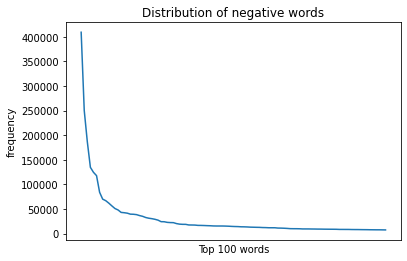

In [9]:
import settings
df2= pd.read_excel(settings.csv_path+'/text_statistic.xlsx', index_col=0,sheet_name='Only negative')
df2['percent'] = (df2['word'] / df2['word'].sum()) * 100
df3=df2.head(100)
df3['word'].plot(xticks=[], xlabel='Top 100 words',ylabel='frequency', title='Distribution of negative words')

Tone by year of filing:


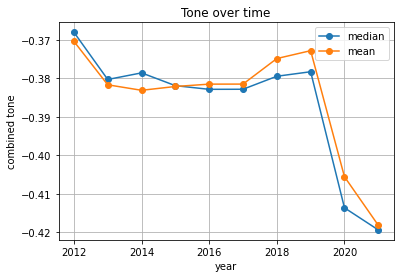

Average tone before March 2020: -0.3817
Average abnormal return before March 2020: 0.0025
Average tone since March 2020: -0.4203
Average abnormal return since March 2020: -0.001


In [10]:
#Tone by year of filing
print('Tone by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
year_list=[]
tone_median_list=[]
tone_mean_list=[]
for year in range(2012,2022):
    df1 = df[df['filingDate'].dt.year == year]
    year_list.append(year)
    tone_mean_list.append(df1['tone'].mean())
    tone_median_list.append(df1['tone'].median())

  
plt.plot(year_list, tone_median_list, marker='o', label="median")
plt.plot(year_list, tone_mean_list, marker='o', label= "mean")
plt.title('Tone over time')
plt.ylabel('combined tone')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.show()

df_precovid=df.loc[(df['reportDate'] < '2020-03-1')]
print('Average tone before March 2020:',round(df_precovid['tone'].mean(),4))
print('Average abnormal return before March 2020:',round(df.loc[(df['reportDate'] < '2020-03-1')]['abnormal_return'].mean(),4))
df_covid= df.loc[(df['reportDate'] > '2020-03-1')]
print('Average tone since March 2020:', round(df_covid['tone'].mean(),4))
print('Average abnormal return since March 2020:', round(df_covid['abnormal_return'].mean(),4))

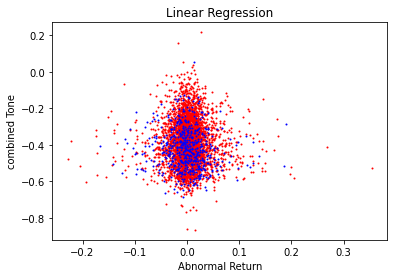

In [11]:
#Comparsion Data before Covid after Covid
X1 = df_precovid.loc[:, 'abnormal_return'].values.reshape(-1, 1) 
Y1 = df_precovid.loc[:, 'tone'].values.reshape(-1, 1)
X2 = df_covid.loc[:, 'abnormal_return'].values.reshape(-1, 1) 
Y2 = df_covid.loc[:, 'tone'].values.reshape(-1, 1) 

plt.scatter(X1, Y1, s=1, color='r')
plt.scatter(X2, Y2, s=1, color='b')
plt.xlabel('Abnormal Return')
plt.ylabel('combined Tone')
plt.title('Linear Regression')
plt.show()

Abnormal return by year of filing:


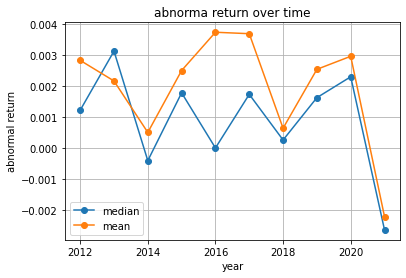

abnormal return mean: 0.0021
abnormal return median: 0.0012
abnornaml return mean min, max: -0.0022 0.0037
abnormal return median min, max: -0.0026 0.0031


In [12]:
#abnormal return by year of filing
print('Abnormal return by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
year_list=[]
return_median_list=[]
return_mean_list=[]
for year in range(2012,2022):
    df1 = df[df['filingDate'].dt.year == year]
    year_list.append(year)
    return_mean_list.append(df1['abnormal_return'].mean())
    return_median_list.append(df1['abnormal_return'].median())

  
plt.plot(year_list, return_median_list, marker='o', label="median")
plt.plot(year_list, return_mean_list, marker='o', label= "mean")
plt.title('abnorma return over time')
plt.ylabel('abnormal return')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.show()
print('abnormal return mean:', round(df['abnormal_return'].mean(),4))
print('abnormal return median:', round(df['abnormal_return'].median(),4))
print('abnornaml return mean min, max:', round(min(return_mean_list),4), round(max(return_mean_list),4))
print('abnormal return median min, max:', round(min(return_median_list),4), round(max(return_median_list),4))

doc lenght by year of filing:


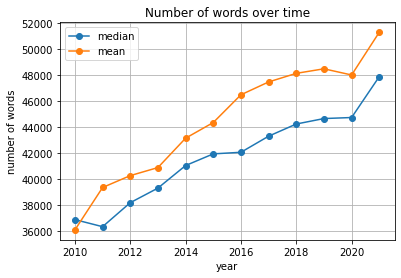

In [13]:
#doc lenght by year of filing
print('doc lenght by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
year_list=[]
lenght_median_list=[]
lenght_mean_list=[]
for year in range(2010,2022):
    df1 = df[df['filingDate'].dt.year == year]
    year_list.append(year)
    lenght_mean_list.append(df1['number of words'].mean())
    lenght_median_list.append(df1['number of words'].median())

  
plt.plot(year_list, lenght_median_list, marker='o', label="median")
plt.plot(year_list, lenght_mean_list, marker='o', label= "mean")
plt.title('Number of words over time')
plt.ylabel('number of words')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.show()
